In [11]:
import numpy as np
import matplotlib.pyplot as plt
import constants as c

In [3]:
# Load data study betas

accs_betas = np.squeeze(np.load('Accuracy_vs_Sparsity/Accs_betas.npy'))
spks_betas = np.sum(np.load('Accuracy_vs_Sparsity/Spks_tot_betas.npy'), axis=3) 

print(f"{np.shape(accs_betas)} - [surrogates, betas, train-test, epoch]")
print(f"{np.shape(spks_betas)} - [surrogates, betas, epoch, layer]")

(3, 6, 2, 200) - [surrogates, betas, train-test, epoch]
(3, 6, 200) - [surrogates, betas, epoch, layer]


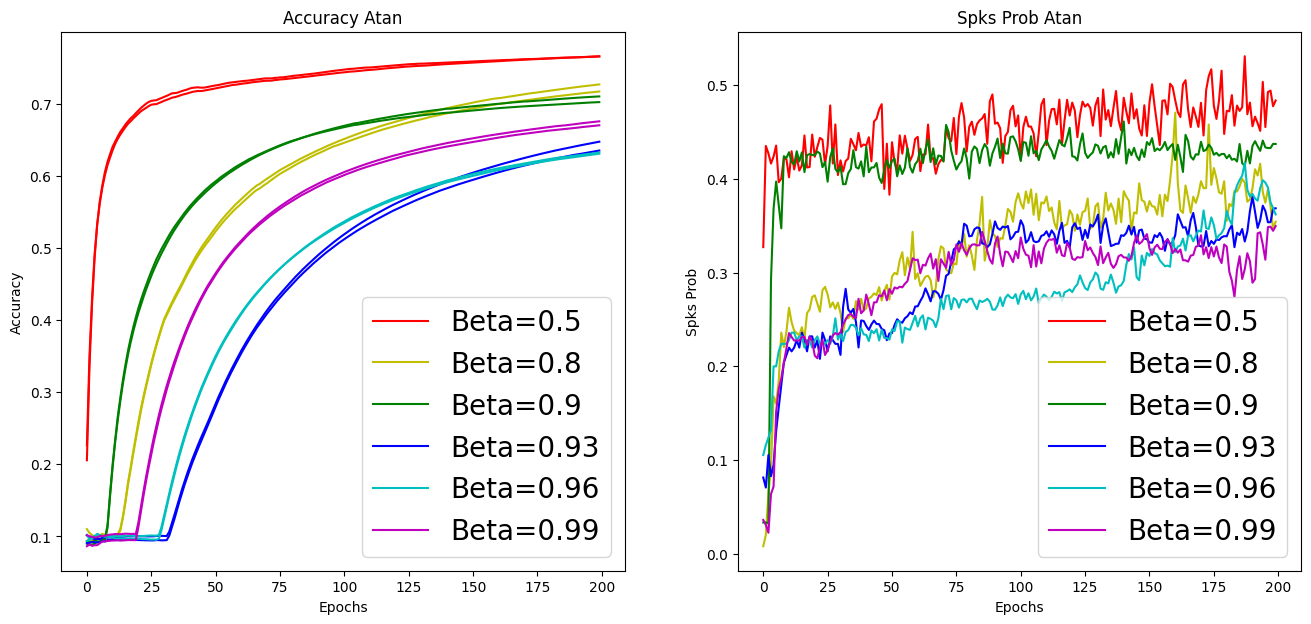

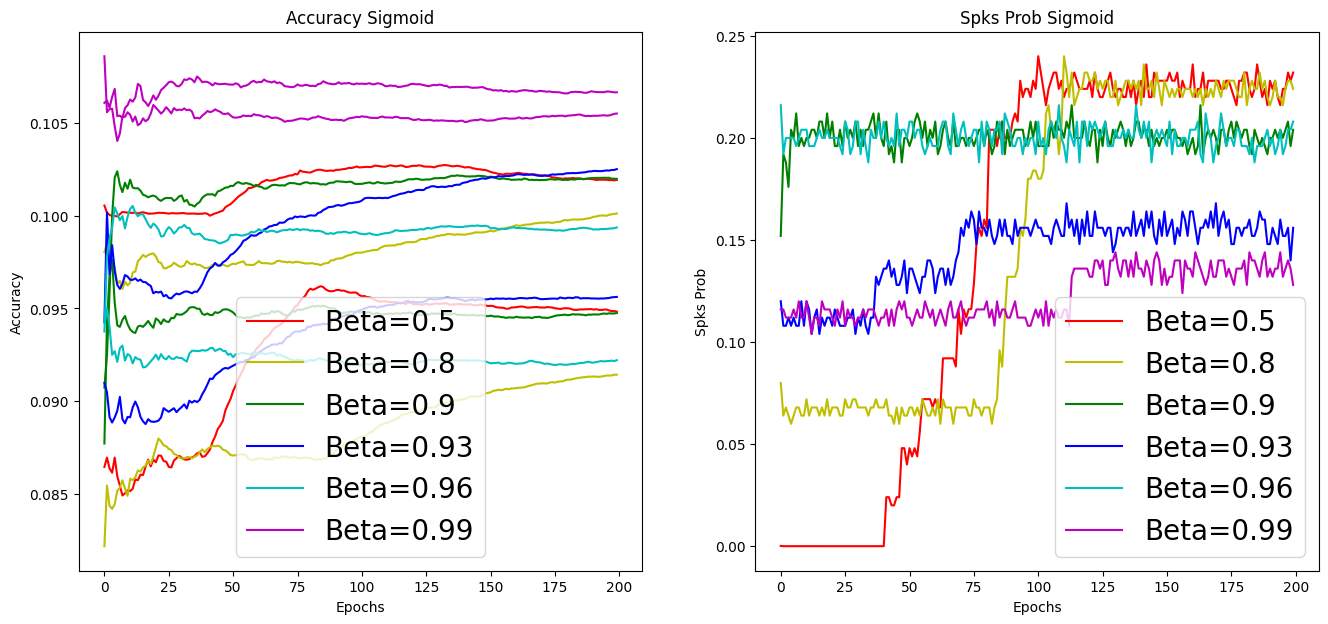

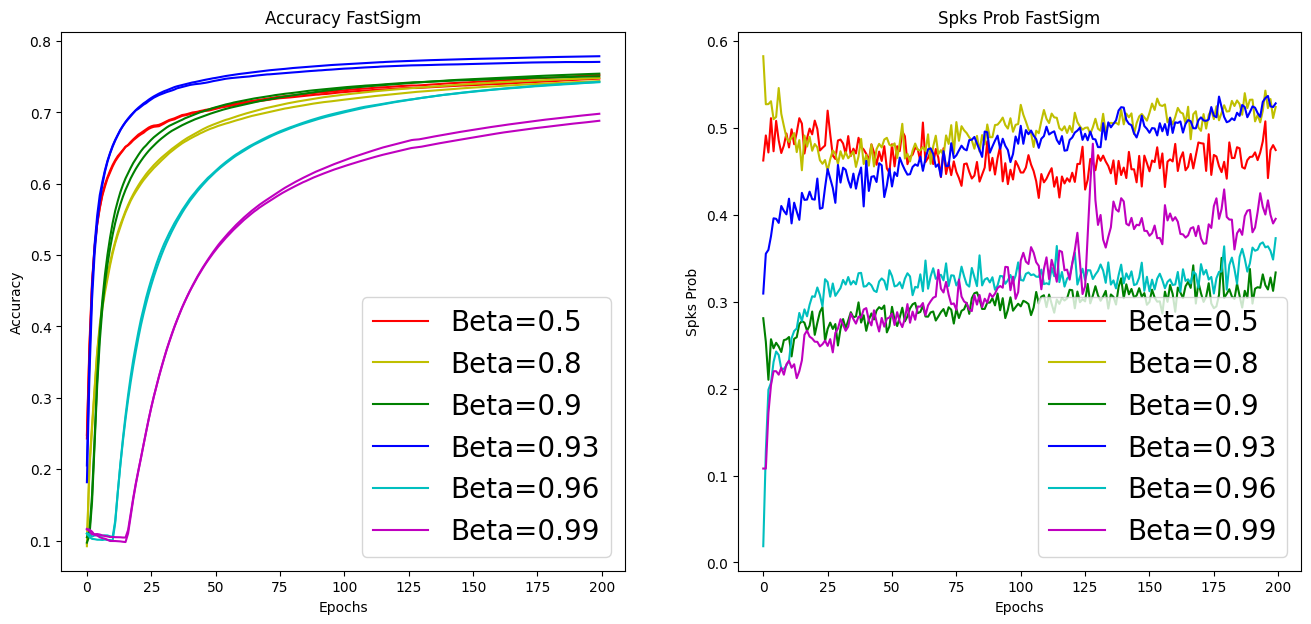

In [10]:
# Plot Atan vs Sigmoid, vs Fast Sigmoid, for betas

epochs = range(np.shape(accs_betas)[-1])

colors = ['r', 'y', 'g', 'b', 'c', 'm', 'k']
betas = [0.5, 0.8, 0.9, 0.93, 0.96, 0.99]
SURR_NAMES = ['Atan', 'Sigmoid', 'FastSigm']

def plot_surrogate_betas(index_surr: int):
    fig, axes = plt.subplots(1,2, figsize=(16,7))
    # loop over the betas
    for i, beta in enumerate(betas):
        axes[0].plot(epochs, accs_betas[index_surr][i][0], f'{colors[i]}', label=f'Beta={beta}')
        axes[0].plot(epochs, accs_betas[index_surr][i][1], f'{colors[i]}')
        axes[1].plot(epochs, spks_betas[index_surr][i], f'{colors[i]}', label=f'Beta={beta}')

    axes[0].set_title(f'Accuracy {SURR_NAMES[index_surr]}')
    axes[1].set_title(f'Spks Prob {SURR_NAMES[index_surr]}')
    axes[0].set_xlabel('Epochs')
    axes[1].set_xlabel('Epochs')
    axes[0].set_ylabel('Accuracy')
    axes[1].set_ylabel('Spks Prob')
    axes[0].legend(fontsize=20)
    axes[1].legend(fontsize=20)


for index in range(len(SURR_NAMES)):
    plot_surrogate_betas(index_surr=index) 

plt.show()